## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [11]:

diabetes_data = pd.read_csv('/Users/cicisofia/Downloads/diabetes.csv')
diabetes_data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [15]:
# Check dataset info
diabetes_data.info()

# Check for missing values
print("\nMissing values per column:")
print(diabetes_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Missing values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Ag

**<font color='teal'> Apply the describe function to the data.</font>**

In [17]:

# Get basic statistics
diabetes_data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [19]:

# Define the columns where 0s should be treated as missing
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with NaN in the specified columns
diabetes_data[columns_to_replace] = diabetes_data[columns_to_replace].replace(0, np.nan)

# Confirm the number of missing values per column
diabetes_data.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**<font color='teal'> Plot histograms of each column. </font>**

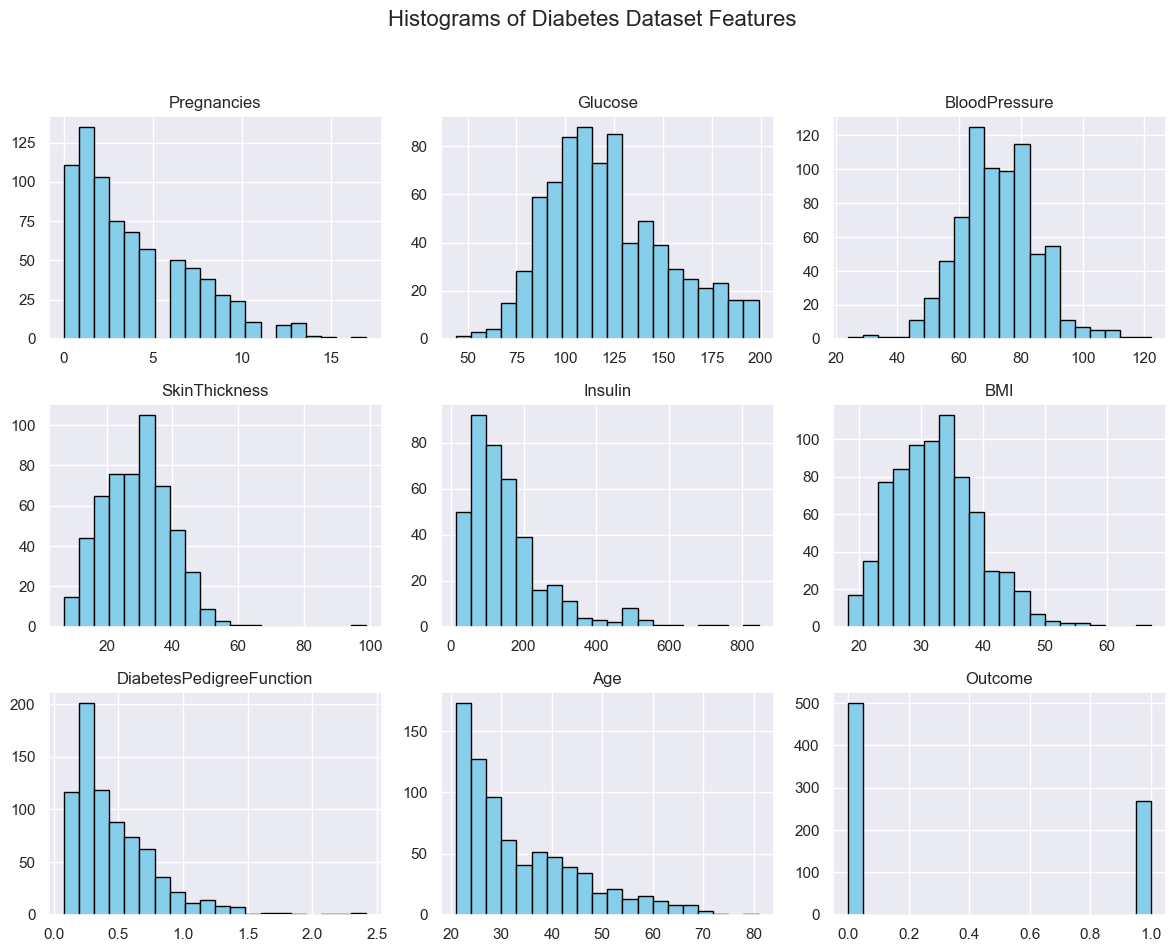

In [21]:

# Set the figure size and layout
diabetes_data.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Diabetes Dataset Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Replace the zeros with mean and median values.

In [25]:
# Replace missing values using mean or median as appropriate
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace=True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace=True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace=True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace=True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace=True)


**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

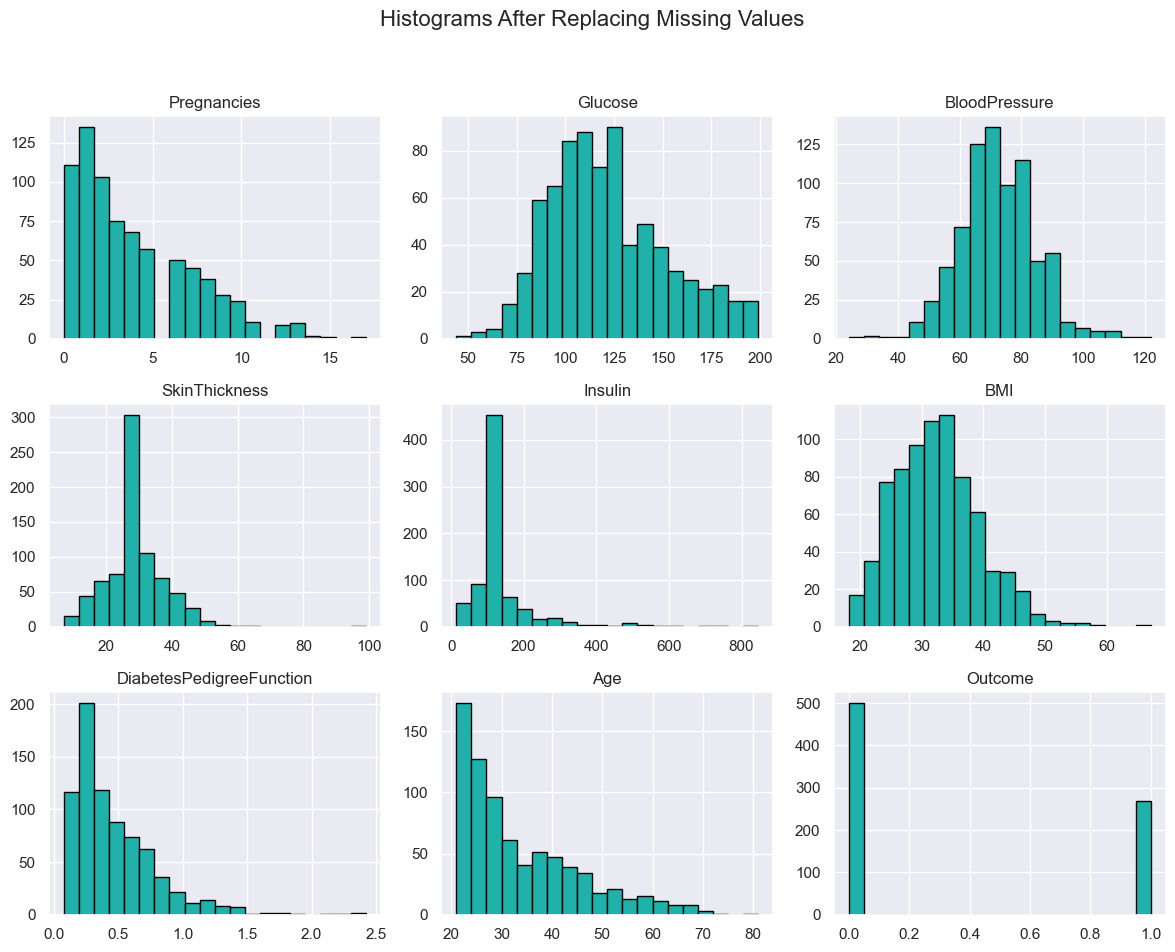

In [27]:
# Plot updated histograms for each column
diabetes_data.hist(figsize=(12, 10), bins=20, color='lightseagreen', edgecolor='black')
plt.suptitle('Histograms After Replacing Missing Values', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


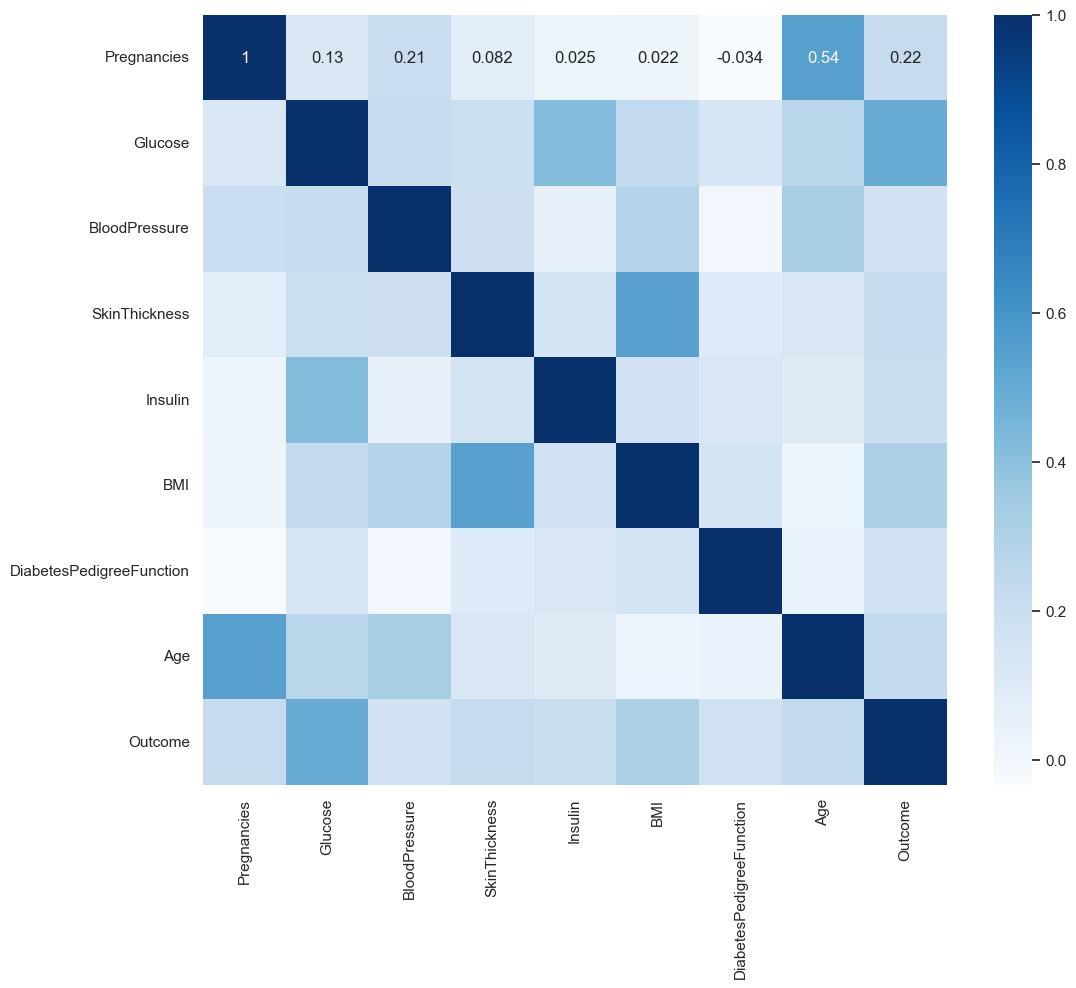

In [29]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

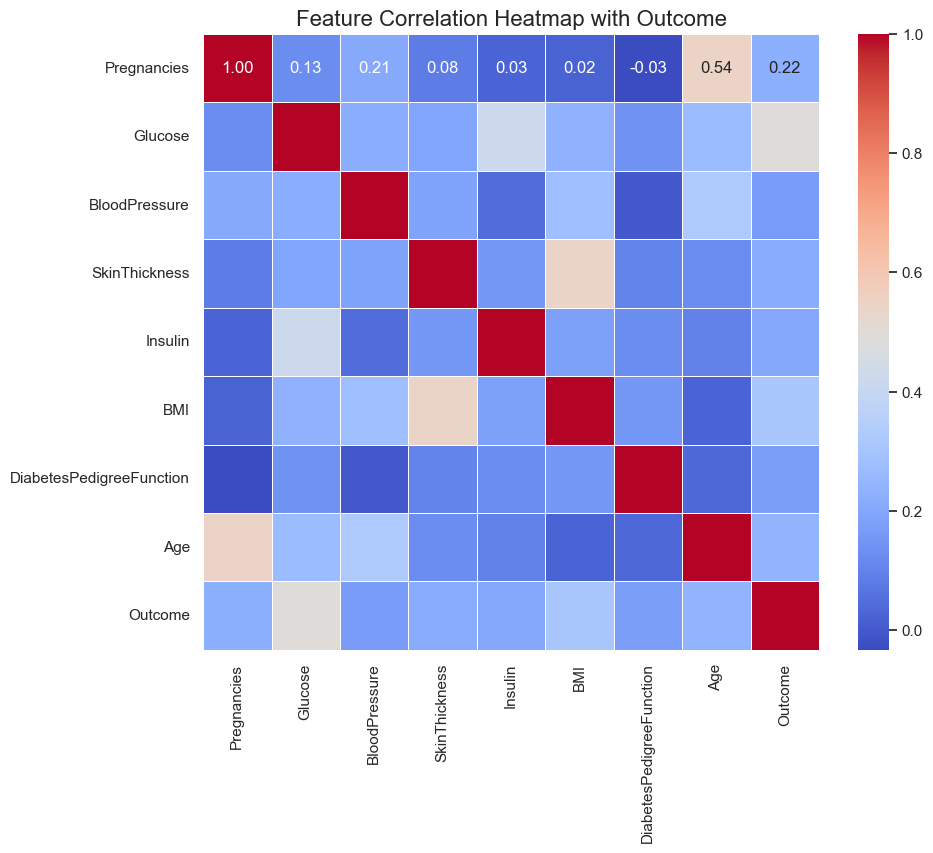

In [31]:

# Define the target variable
y = diabetes_data['Outcome']

# Create a correlation matrix
corr_matrix = diabetes_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap with Outcome', fontsize=16)
plt.show()


**<font color='teal'> Create a 70/30 train and test split. </font>**

In [33]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Split the data: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# Confirm the sizes
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (537, 8)
Test set size: (231, 8)


**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [35]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Use the same fitted scaler to transform the test data
X_test_scaled = scaler.transform(X_test)


#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [37]:
from sklearn.neighbors import KNeighborsClassifier

# Lists to store scores
test_scores = []
train_scores = []

# Try K values from 1 to 10
for i in range(1, 11):  # Note: changed to range(1, 11) to include 10
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)

    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

# Print results
for i in range(1, 11):
    print(f"K = {i}: Train Accuracy = {train_scores[i-1]:.4f}, Test Accuracy = {test_scores[i-1]:.4f}")


K = 1: Train Accuracy = 1.0000, Test Accuracy = 0.7186
K = 2: Train Accuracy = 0.8436, Test Accuracy = 0.7229
K = 3: Train Accuracy = 0.8622, Test Accuracy = 0.7403
K = 4: Train Accuracy = 0.8287, Test Accuracy = 0.7403
K = 5: Train Accuracy = 0.8343, Test Accuracy = 0.7446
K = 6: Train Accuracy = 0.8101, Test Accuracy = 0.7403
K = 7: Train Accuracy = 0.8063, Test Accuracy = 0.7359
K = 8: Train Accuracy = 0.8063, Test Accuracy = 0.7489
K = 9: Train Accuracy = 0.8007, Test Accuracy = 0.7446
K = 10: Train Accuracy = 0.8101, Test Accuracy = 0.7359


**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Lists to store accuracy scores
test_scores = []
train_scores = []

# Iterate over k values from 1 to 10
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)

    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)

    print(f"K = {i}: Train Accuracy = {train_score:.4f}, Test Accuracy = {test_score:.4f}")


K = 1: Train Accuracy = 1.0000, Test Accuracy = 0.7186
K = 2: Train Accuracy = 0.8436, Test Accuracy = 0.7229
K = 3: Train Accuracy = 0.8622, Test Accuracy = 0.7403
K = 4: Train Accuracy = 0.8287, Test Accuracy = 0.7403
K = 5: Train Accuracy = 0.8343, Test Accuracy = 0.7446
K = 6: Train Accuracy = 0.8101, Test Accuracy = 0.7403
K = 7: Train Accuracy = 0.8063, Test Accuracy = 0.7359
K = 8: Train Accuracy = 0.8063, Test Accuracy = 0.7489
K = 9: Train Accuracy = 0.8007, Test Accuracy = 0.7446
K = 10: Train Accuracy = 0.8101, Test Accuracy = 0.7359


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [41]:
# Find the index (k-1) of the highest training score
best_k_train = train_scores.index(max(train_scores)) + 1  # +1 to correct the index

print(f"The number of neighbors that resulted in the highest training accuracy is: K = {best_k_train}")
print(f"Training Accuracy at K = {best_k_train}: {max(train_scores):.4f}")


The number of neighbors that resulted in the highest training accuracy is: K = 1
Training Accuracy at K = 1: 1.0000


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [43]:
# Find the index (k-1) of the highest testing score
best_k_test = test_scores.index(max(test_scores)) + 1  # +1 to match actual k

print(f"The number of neighbors that resulted in the highest testing accuracy is: K = {best_k_test}")
print(f"Testing Accuracy at K = {best_k_test}: {max(test_scores):.4f}")


The number of neighbors that resulted in the highest testing accuracy is: K = 8
Testing Accuracy at K = 8: 0.7489


Plot the train and test model performance by number of neighbors.

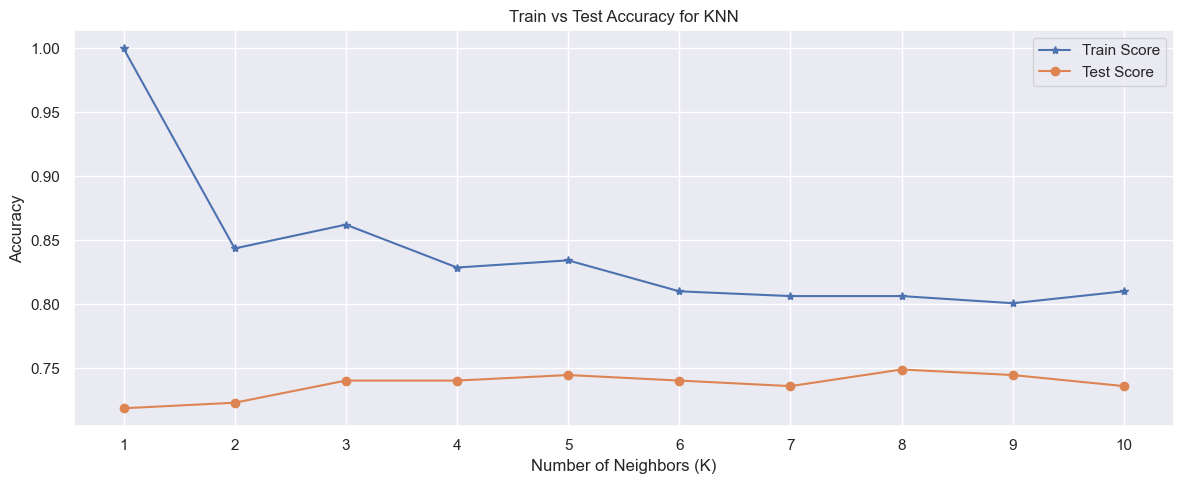

In [49]:
import matplotlib.pyplot as plt

# Plot using Matplotlib only
plt.figure(figsize=(12, 5))
plt.plot(range(1, 11), train_scores, marker='*', linestyle='-', label='Train Score')
plt.plot(range(1, 11), test_scores, marker='o', linestyle='-', label='Test Score')

plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy for KNN')
plt.xticks(range(1, 11))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [51]:
# Get best k based on highest test accuracy
best_k = test_scores.index(max(test_scores)) + 1
print(f"Best number of neighbors (k): {best_k}")

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the final model
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = knn_best.predict(X_test_scaled)

# Evaluate the model
print(f"Test Accuracy (k={best_k}): {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Best number of neighbors (k): 8
Test Accuracy (k=8): 0.7489

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       150
           1       0.70      0.49      0.58        81

    accuracy                           0.75       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.74      0.75      0.74       231

Confusion Matrix:
[[133  17]
 [ 41  40]]


In [55]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test_scaled)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

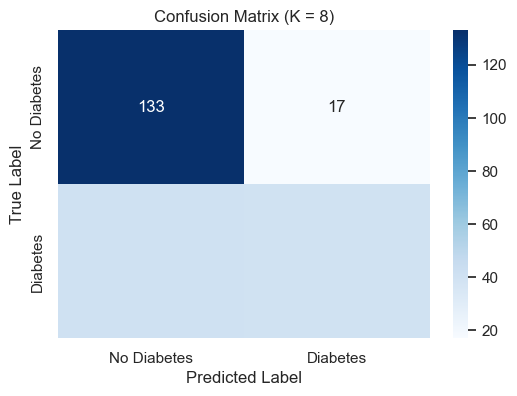

In [57]:

from sklearn.metrics import confusion_matrix

# Predict using the final model
y_pred = knn_best.predict(X_test_scaled)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (K = {best_k})')
plt.show()


**<font color='teal'> Print the classification report </font>**

In [59]:
from sklearn.metrics import classification_report

# Generate predictions using the final KNN model
y_pred = knn_best.predict(X_test_scaled)

# Print the classification report
print(f"Classification Report (K = {best_k}):")
print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))


Classification Report (K = 8):
              precision    recall  f1-score   support

 No Diabetes       0.76      0.89      0.82       150
    Diabetes       0.70      0.49      0.58        81

    accuracy                           0.75       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.74      0.75      0.74       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Use scaled X
X_scaled = scaler.fit_transform(X)

# Set the range of k values
param_grid = {'n_neighbors': np.arange(1, 50)}

# Set up KNN and GridSearchCV
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)

# Fit the model
knn_cv.fit(X_scaled, y)

# Show results
print("Best k:", knn_cv.best_params_['n_neighbors'])
print("Best cross-validated accuracy:", knn_cv.best_score_)


Best k: 25
Best cross-validated accuracy: 0.7721840251252015


#### Print the best score and best parameter for n_neighbors.

In [65]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7721840251252015
Best Parameters: {'n_neighbors': 25}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the parameter grid for n_estimators
param_grid = {'n_estimators': np.arange(10, 201, 10)}  # Try 10 to 200 in steps of 10

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
rf_cv = GridSearchCV(rf, param_grid, cv=5)

# Fit the model on the same scaled feature set
rf_cv.fit(X_scaled, y)

# Print the best parameters and score
print(f"Best Score: {rf_cv.best_score_:.4f}")
print(f"Best Parameters: {rf_cv.best_params_}")


Best Score: 0.7670
Best Parameters: {'n_estimators': 20}
